# Import all the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Read the dataset from remote machine

In [2]:
A = pd.read_csv("/Users/vipulghare/Desktop/ETL Hive/csvfiles/sidhardhan/Regression/Big Mart Sales/train.csv")

# Preview the dataset

In [3]:
A.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Get information about the dataset

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Describe function will tell you more about the dataset

In [5]:
A.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Check the collinearity

In [6]:
A.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

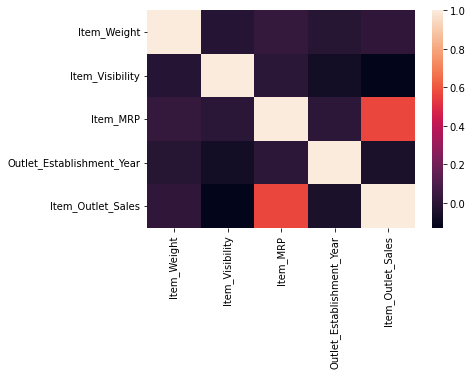

In [7]:
sb.heatmap(A.corr())

# Drop unnecessary columns

In [8]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
con

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

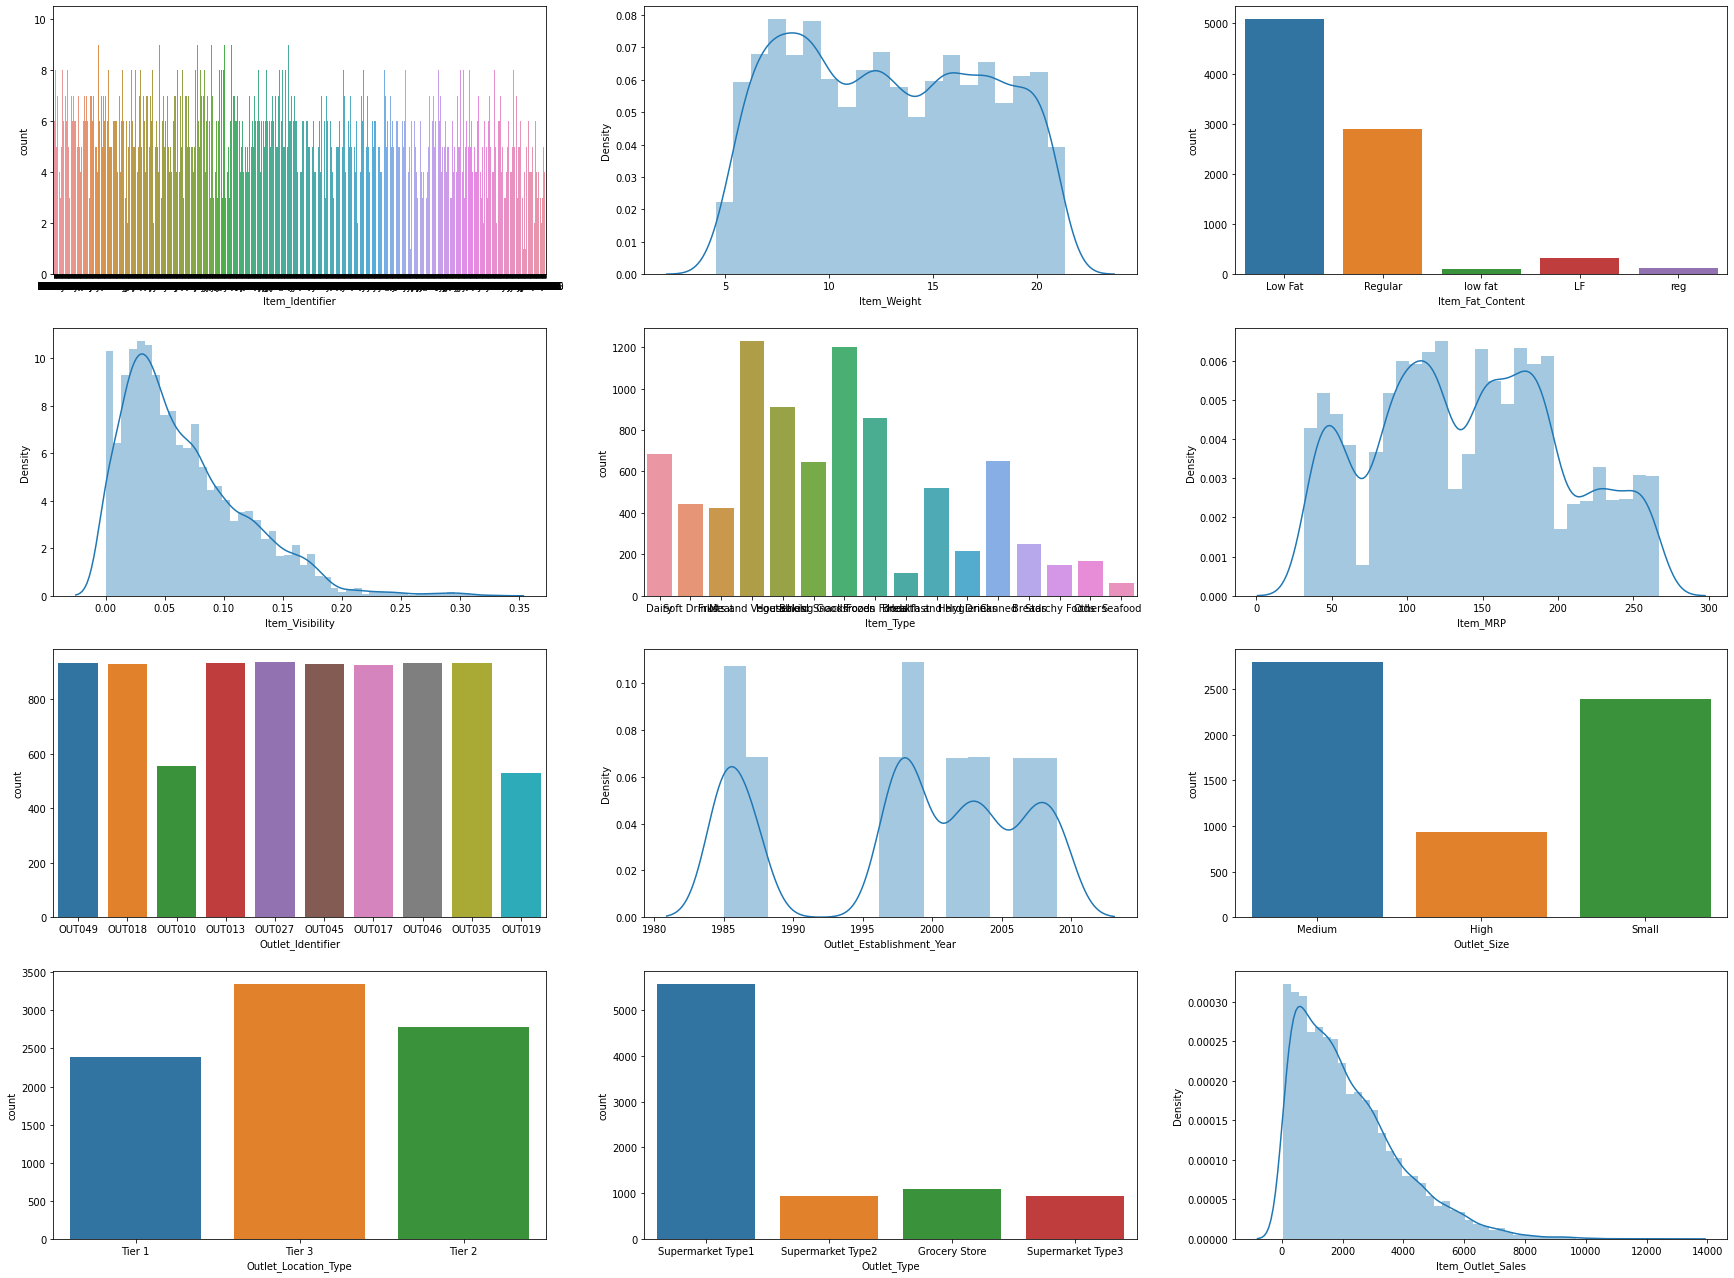

In [11]:
plt.figure(figsize=(30,70))
m = 1
for i in A.columns:
    plt.subplot(A.shape[1],3,m)
    if(A[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

In [12]:
A["Item_Identifier"]

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [13]:
A = A.drop(labels=["Item_Identifier"],axis=1)

In [14]:
A

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Declare Predictor and Target varibale

In [15]:
Y = A[["Item_Outlet_Sales"]]

In [16]:
X = A.drop(labels=["Item_Outlet_Sales"],axis=1)

In [17]:
Y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [18]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


# Exploratory Data Analysis

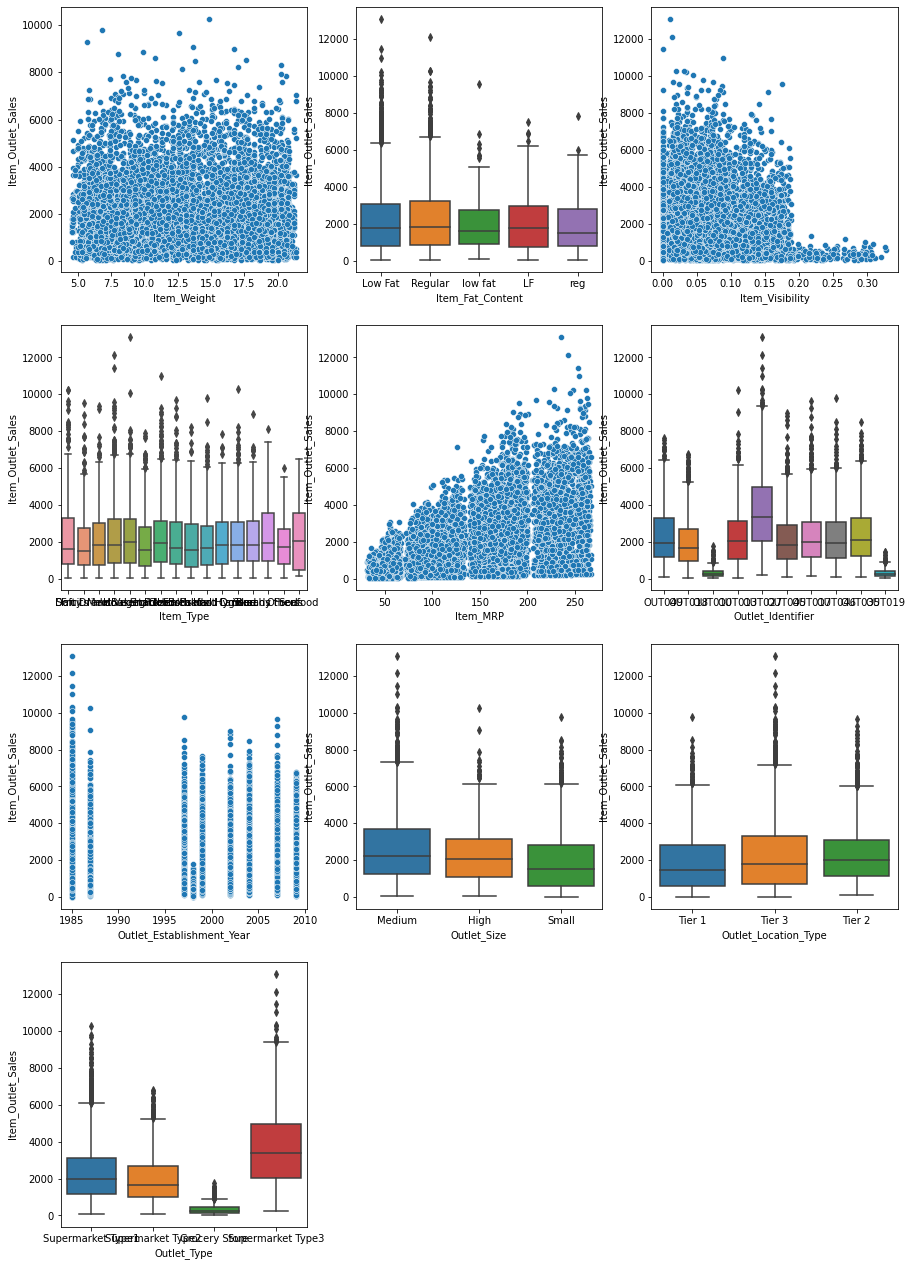

In [19]:
plt.figure(figsize=(15,40))
m = 1
for i in X.columns:
    plt.subplot(7,3,m)
    if(X[i].dtypes=="object"):
        sb.boxplot(X[i],A.Item_Outlet_Sales)
    else:
        sb.scatterplot(X[i],A.Item_Outlet_Sales)
    m = m + 1

# Missing data treatment

In [20]:
X.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [21]:
A["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [22]:
A["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [23]:
def replacer(df):
    Q = pd.DataFrame(df.isna().sum(),columns=["CT"])
    missingcolumns = list(Q[Q.CT > 0].index)
    for i in missingcolumns:
        if(df[i].dtypes=="object"):
            replacer = df[i].mode()[0]
            df[i] = df[i].fillna(replacer)
        else:
            replacer = df[i].mean()
            df[i] = df[i].fillna(replacer)
    return df.isna().sum() 

In [24]:
replacer(X)

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [25]:
Y.isna().sum()

Item_Outlet_Sales    0
dtype: int64

# Checking skew 

In [26]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

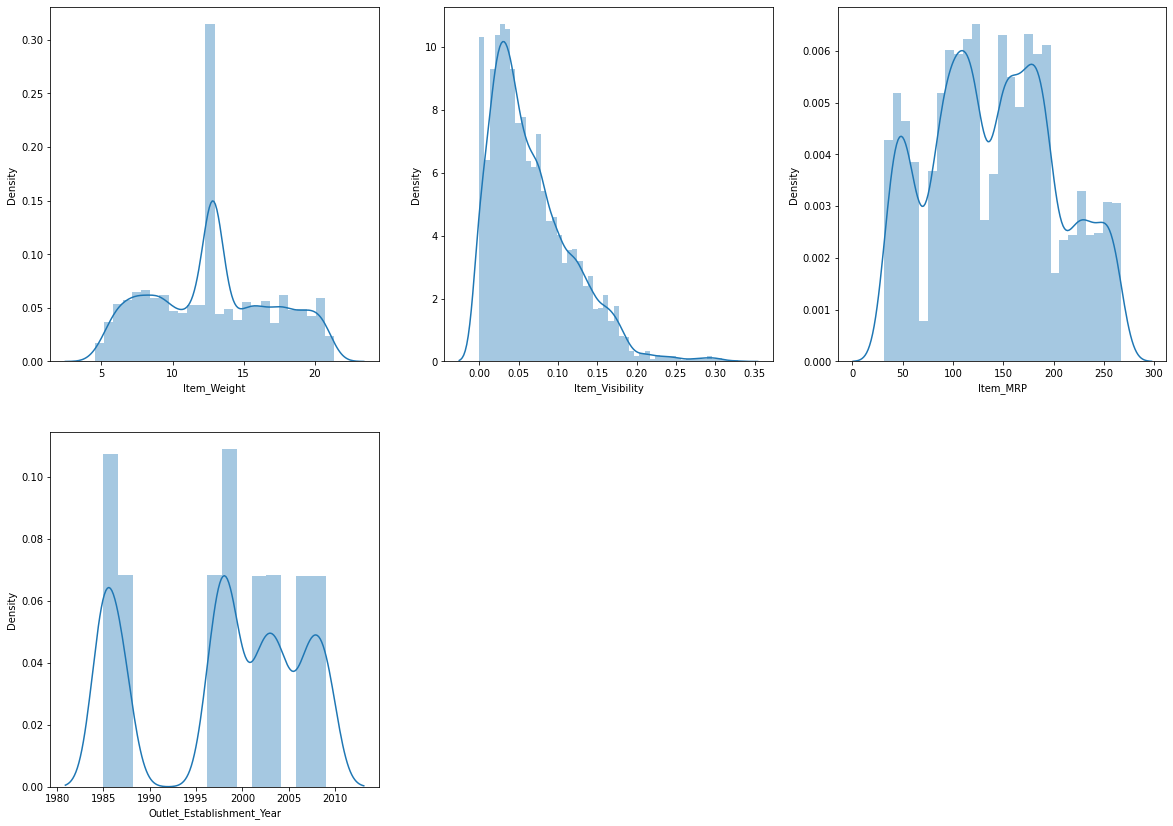

In [27]:
import seaborn as sb
plt.figure(figsize=(20,30))
m = 1
for i in X[con].columns:
    plt.subplot(X[con].shape[1],3,m)
    sb.distplot(X[i])
    m = m+1

In [28]:
for i in X[con]:
    print(i,X[i].skew())

Item_Weight 0.09056145191764828
Item_Visibility 1.1670905496918396
Item_MRP 0.1272022683110526
Outlet_Establishment_Year -0.39664078591550556


# Standarize the Data

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XS1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
XS2 = pd.get_dummies(X[cat])
X = XS1.join(XS2)

In [30]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,-0.970732,1.747454,0.139541,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.641706,-0.908111,-1.489023,1.334103,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1.098554,-0.956917,0.010040,0.139541,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1.500838,-1.281758,0.660050,0.020085,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,-0.929428,-1.281758,-1.399220,-1.293934,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# Split the data in training and testing data

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=34)

# Fitting Multiple Decision Tree Regression to the Training set

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model = dtr.fit(xtrain,ytrain)
pred = model.predict(xtest)

# Calculation of Error of the model

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

1071.9149605865102